### Step 1: Load the dataset

In [8]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True)

In [9]:
print(list(newsgroups_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


### Step 2: Data Preprocessing¶


In [10]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

import nltk

import pandas as pd
stemmer = SnowballStemmer("english")

/Users/williamjaubert/anaconda2/envs/nautilus/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""


In [11]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [12]:
processed_docs = []

for doc in newsgroups_train.data:
    processed_docs.append(preprocess(doc))

### Step 3: Bag of words

In [13]:
# Create the dictionnary
from nautilus_nlp.models.topic_modeling import create_dictionary

In [14]:
dictionary = create_dictionary(processed_docs)

In [15]:
# Filter out tokens that appear in too few or too many documents
from nautilus_nlp.models.topic_modeling import filter_extremes

In [16]:
filter_extremes(dictionary)

In [17]:
# Create the bow 
from nautilus_nlp.models.topic_modeling import create_bow_corpus

In [18]:
bow_corpus = create_bow_corpus(processed_docs, dictionary)

In [20]:
print(bow_corpus[3])

[(13, 1), (26, 1), (55, 1), (88, 1), (99, 1), (152, 1), (153, 2), (154, 1), (155, 1), (156, 1), (157, 2), (158, 1), (159, 2), (160, 4), (161, 1), (162, 2), (163, 1), (164, 2), (165, 1), (166, 1), (167, 1), (168, 1), (169, 1), (170, 1), (171, 1), (172, 1), (173, 1), (174, 1), (175, 1), (176, 1), (177, 1), (178, 2), (179, 1), (180, 1), (181, 1), (182, 1)]


### Step 4: Find optimal number of topics

In [13]:
# Compute coherence values for various number of topics in order to pick the optimal one
from nautilus_nlp.models.topic_modeling import compute_coherence_values

In [14]:
# Take a long time to run
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, bow_corpus=bow_corpus, texts=processed_docs, start=2, limit=25, step=4)


In [17]:
coherence_values

[0.37900998646286865,
 0.42680154447577845,
 0.47716566398237525,
 0.5261650723885645,
 0.49607461078243215,
 0.4978727171365794]

In [2]:
from nautilus_nlp.models.topic_modeling import plot_optimal_topic_number

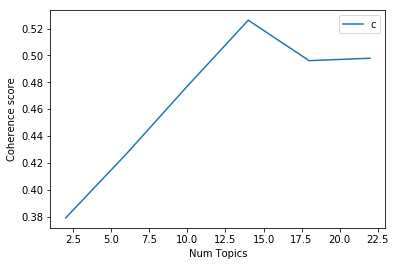

In [3]:
plot_optimal_topic_number(coherence_values, start=2, limit=25, step=4)

In [4]:
# Print the coherences scores for the number we tested
from nautilus_nlp.models.topic_modeling import print_coherence_scores

In [5]:
print_coherence_scores(coherence_values)

Num Topics = 2  has Coherence Value of 0.379
Num Topics = 6  has Coherence Value of 0.4268
Num Topics = 10  has Coherence Value of 0.4772
Num Topics = 14  has Coherence Value of 0.5262
Num Topics = 18  has Coherence Value of 0.4961
Num Topics = 22  has Coherence Value of 0.4979


### Step 5: Running LDA using Bag of Words

In [12]:
# Train the LDA model with gensim
from nautilus_nlp.models.topic_modeling import train_lda_model

In [13]:
model = train_lda_model(bow_corpus, dictionary, 10)

In [14]:
model

In [15]:
# Save model
from nautilus_nlp.models.topic_modeling import save_model

In [16]:
save_model(model,'/Users/williamjaubert/Documents/Allianz_William/notebook', 'ldamodel_nautilus')

In [152]:
# Load model

In [17]:
from nautilus_nlp.models.topic_modeling import load_model

In [18]:
model_loaded = load_model('/Users/williamjaubert/Documents/Allianz_William/notebook', 'ldamodel_nautilus')
model_loaded

### Step 6: Visualize the top keywords per topic with Pyldavis interactive chart

In [19]:
# Display the top keywords per topic in a interactive chart
from nautilus_nlp.models.topic_modeling import visualize_topics

In [155]:
p = visualize_topics(model, bow_corpus, dictionary)
p

/Users/williamjaubert/anaconda2/envs/nautilus/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.078669 -0.151706       1        1  13.182505
0     -0.016999 -0.150447       2        1  12.926197
7      0.208967  0.080137       3        1  12.463007
8      0.147446  0.136478       4        1  11.995771
1     -0.008849 -0.009046       5        1   9.559109
3     -0.045054  0.003907       6        1   9.468682
6     -0.089499  0.144727       7        1   8.927140
9      0.107803 -0.077376       8        1   7.882134
4      0.004524 -0.105100       9        1   7.024930
5     -0.229669  0.128426      10        1   6.570525, topic_info=     Category         Freq        Term        Total  loglift  logprob
1037  Default  2966.000000      window  2966.000000  30.0000  30.0000
1193  Default  1940.000000        game  1940.000000  29.0000  29.0000
482   Default  1924.000000   christian  1924.000000  28.0000  28.0000
702   Default  1689.000000        team  1689.000000  27.0000  27.0000
352   Default  2638.000000       drive  2638.000000  26.0000  26.0000
320   Default  2883.000000        file  2883.000000  25.0000  25.0000
696   Default  1860.000000       space  1860.000000  24.0000  24.0000
1467  Default  1161.000000     encrypt  1161.000000  23.0000  23.0000
256   Default  1997.000000      govern  1997.000000  22.0000  22.0000
153   Default  1477.000000        chip  1477.000000  21.0000  21.0000
522   Default  1274.000000       jesus  1274.000000  20.0000  20.0000
1347  Default  1017.000000      israel  1017.000000  19.0000  19.0000
36    Default  1577.000000        card  1577.000000  18.0000  18.0000
120   Default  1423.000000        play  1423.000000  17.0000  17.0000
964   Default  1059.000000       secur  1059.000000  16.0000  16.0000
657   Default  1331.000000        nasa  1331.000000  15.0000  15.0000
1821  Default  1142.000000    armenian  1142.000000  14.0000  14.0000
822   Default  2599.000000     program  2599.000000  13.0000  13.0000
1346  Default   837.000000        isra   837.000000  12.0000  12.0000
513   Default  1391.000000        imag  1391.000000  11.0000  11.0000
117   Default  6052.000000       peopl  6052.000000  10.0000  10.0000
3565  Default   742.000000      hockey   742.000000   9.0000   9.0000
739   Default   990.000000      player   990.000000   8.0000   8.0000
1457  Default   784.000000     clipper   784.000000   7.0000   7.0000
326   Default  1802.000000      public  1802.000000   6.0000   6.0000
41    Default  1023.000000        disk  1023.000000   5.0000   5.0000
28    Default  4004.000000        year  4004.000000   4.0000   4.0000
380   Default   867.000000        scsi   867.000000   3.0000   3.0000
879   Default  1191.000000      driver  1191.000000   2.0000   2.0000
444   Default   747.000000        bike   747.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
5004  Topic10   178.948181     stanley   185.594589   2.6861  -6.0394
702   Topic10  1384.116455        team  1689.568604   2.5232  -3.9937
4840  Topic10   160.981583         jet   167.196503   2.6847  -6.1452
3815  Topic10   191.566772       coach   202.233215   2.6684  -5.9713
3537  Topic10   221.759384      ranger   240.052933   2.6433  -5.8249
4877  Topic10   157.258331    winnipeg   165.160721   2.6735  -6.1686
1193  Topic10  1290.715576        game  1940.664795   2.3147  -4.0636
120   Topic10   920.770020        play  1423.930298   2.2866  -4.4013
711   Topic10   312.806488        wing   399.885132   2.4770  -5.4809
739   Topic10   623.101746      player   990.567200   2.2590  -4.7918
1311  Topic10   397.739624    columbia   559.283691   2.3817  -5.2407
1080  Topic10   455.438751      season   670.126038   2.3364  -5.1053
3252  Topic10   379.943481       leagu   536.827942   2.3769  -5.2865
1073  Topic10   351.761322  pittsburgh   505.782318   2.3594  -5.3636
1679  Topic10   356.976562       score   528.273926   2.3306  -5.3488
1321  Topic10   374

In [23]:
# Save the pyldavis as HTML
from nautilus_nlp.models.topic_modeling import save_pyldavis

In [24]:
save_pyldavis(p, '/Users/williamjaubert/Documents/Allianz_William/', 'pyldavis_test_func')

In [27]:
# Load the pyldavis HTML
from nautilus_nlp.models.topic_modeling import show_pyldavis

In [26]:
show_pyldavis('/Users/williamjaubert/Documents/Allianz_William/', 'pyldavis_test_func')

### Step 7: Testing model on unseen document

In [74]:
unseen_document = newsgroups_test.data[100]
print(unseen_document)

Subject: help
From: C..Doelle@p26.f3333.n106.z1.fidonet.org (C. Doelle)
Lines: 13

Hello All!

    It is my understanding that all True-Type fonts in Windows are loaded in
prior to starting Windows - this makes getting into Windows quite slow if you
have hundreds of them as I do.  First off, am I correct in this thinking -
secondly, if that is the case - can you get Windows to ignore them on boot and
maybe make something like a PIF file to load them only when you enter the
applications that need fonts?  Any ideas?


Chris

 * Origin: chris.doelle.@f3333.n106.z1.fidonet.org (1:106/3333.26)



In [75]:
# Data preprocessing step for the unseen document
bow_new = dictionary.doc2bow(preprocess(unseen_document))

In [48]:
from nautilus_nlp.models.topic_modeling import fit_data

In [31]:
fit_data(model, bow_new)

[(0, 0.0027796067),
 (1, 0.002779247),
 (2, 0.0027795879),
 (3, 0.0027795406),
 (4, 0.0027792477),
 (5, 0.002779096),
 (6, 0.0027791534),
 (7, 0.20895894),
 (8, 0.76880664),
 (9, 0.0027789928)]

In [1]:
# Show the dominant topics of the new document and their keywords 
from nautilus_nlp.models.topic_modeling import show_dominant_topic

In [147]:
show_dominant_topic(model, bow_new, 3)

Score: 0.7688832879066467	 Topic: ['window', 'drive', 'problem', 'card', 'work']
Score: 0.2088821828365326	 Topic: ['file', 'program', 'mail', 'imag', 'inform']
Score: 0.0027796069625765085	 Topic: ['christian', 'peopl', 'believ', 'jesus', 'say']
